<a href="https://colab.research.google.com/github/vaskar22/Bank-Loan-Prediction/blob/main/BankLoanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).**

Data Set Characteristics :  Multivariate

Number of Instances :   45211

Area : Business

Attribute Characteristics : Real

Number of Attributes : 17

Date Donated : 2012-02-14

Associated Tasks : Classification

Missing Values? - N/A

Number of Web Hits  :  1499635



### **Data Set Information:**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

- bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010)

- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## **Attribute Information:**

Input variables:
### bank client data:
- 1 - age (numeric)
- 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5 - default: has credit in default? (categorical: 'no','yes','unknown')
- 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
- 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### related with the last contact of the current campaign:
- 8 - contact: contact communication type (categorical: 'cellular','telephone')
- 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
- 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 14 - previous: number of contacts performed before this campaign and for this client (numeric)
- 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### social and economic context attributes
- 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
- 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
- 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
- 20 - nr.employed: number of employees - quarterly indicator (numeric)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score  #tp / (tp + fp)
from sklearn.metrics import f1_score         #F1 = 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import recall_score     #tp / (tp + fn)
from sklearn.metrics import roc_auc_score

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
# load the data
data=pd.read_csv('/content/drive/MyDrive/cmi_data/bank-additional-full.csv',delimiter=';')

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### **Dropping duplicate rows**

In [ ]:
data=data.drop_duplicates()

### **Dropping the duration column as its value is known after the client saying yes or no and it is highly correlated with outcome.**

In [ ]:
data.drop(labels="duration",axis=1,inplace=True)       

**------------------------------------------------------------------------------**

### **List the Categorical features in the data**

In [ ]:
categorical= [w for w in data.columns if data[w].dtype=='O']
print('Categorical features are : ',categorical)

Categorical features are :  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


### **check the contribution of categories in each categorical  features**

In [ ]:
for w in categorical:
  print(data[w].value_counts()/np.float(len(data)))
  print('-------------------------------------------------')

admin.           0.253036
blue-collar      0.224718
technician       0.163663
services         0.096343
management       0.071012
retired          0.041723
entrepreneur     0.035360
self-employed    0.034510
housemaid        0.025743
unemployed       0.024626
student          0.021250
unknown          0.008014
Name: job, dtype: float64
-------------------------------------------------
married     0.605231
single      0.280843
divorced    0.111983
unknown     0.001943
Name: marital, dtype: float64
-------------------------------------------------
university.degree      0.295415
high.school            0.231008
basic.9y               0.146809
professional.course    0.127259
basic.4y               0.101418
basic.6y               0.055639
unknown                0.042015
illiterate             0.000437
Name: education, dtype: float64
-------------------------------------------------
no         0.791165
unknown    0.208762
yes        0.000073
Name: default, dtype: float64
--------------------

### we see that 60% clients are married. So, checking if married people are more inclined towards subscribing term deposit

In [ ]:
data_married  = data[data['marital']=='married']

In [ ]:
data_married[data_married['y']=='yes'].count()[0]/data[data['y']=='yes'].count()[0],data_married[data_married['y']=='yes'].count()[0]/data_married.count()[0]

(0.5455917223539556, 0.10156093254684805)

- **we see that  60% married people contribute to 54% of the total positive conversions**
- **However only 10% married people were positive conversions which almost follows the actual positive conversion ratio.** 

### We see that 82% client don't have personal loan. So checking if no loan people are more inclined towards subscribing term deposit

In [ ]:
data_loan = data[data['loan']=='no']

In [ ]:
data_loan[data_loan['y']=='yes'].count()[0]/data[data['y']=='yes'].count()[0],data_loan[data_loan["y"]=="yes"].count()[0]/data_loan.count()[0]

(0.8297046777322699, 0.11341269373563558)

- **We see that 82% client with no personal loan 82% of the total positive conversions**
- **However only 11%  of them were positive conversions which almost follows the actual positive conversion ratio.**

### **Checking the unique no of category in each features**

In [ ]:
for w in categorical:           #Checking the cardinality of each feature.
    print(w, ' contains ', len(data[w].unique()), ' labels')

job  contains  12  labels
marital  contains  4  labels
education  contains  8  labels
default  contains  3  labels
housing  contains  3  labels
loan  contains  3  labels
contact  contains  2  labels
month  contains  10  labels
day_of_week  contains  5  labels
poutcome  contains  3  labels
y  contains  2  labels


**-------------------------------------------------------------------------**

### **List of Numerical Features**

In [ ]:
numerical = [w for w in data.columns if data[w].dtype!='O']                 
print(f'there are {len(numerical)} variable\n')
print('The numerical variables are :', numerical)

there are 9 variable

The numerical variables are : ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


### **Preparing the data for model :**

In [ ]:
Y = data["y"]
X = data.drop(labels="y", axis = 1)

In [ ]:
X_dum = pd.get_dummies(X)

In [ ]:
X_dum.shape, len(Y)

((41176, 62), 41176)

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(["yes","no"])
Y_num = le.transform(Y)
print(le.inverse_transform([0,0,1]))
print(le.classes_)

['no' 'no' 'yes']
['no' 'yes']


In [ ]:
type(Y.values), type(Y_num)

(numpy.ndarray, numpy.ndarray)

In [ ]:
# split the data set into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X_dum, Y_num, test_size=0.2, random_state=42, stratify=Y_num)

In [ ]:
labels = list(X_test.columns)
for i in labels:
    if "unknown" in i:
        c = X_test[X_test[i]==1].count()[0]
        print(i," :unknowns-> ",c)

job_unknown  :unknowns->  63
marital_unknown  :unknowns->  12
education_unknown  :unknowns->  341
default_unknown  :unknowns->  1739
housing_unknown  :unknowns->  211
loan_unknown  :unknowns->  211


### **Remove unknown entry**

In [ ]:
def remove_unknown_entries(dataX, dataY, unknown_label = "unknown"):
    data1 = dataX
    data1["y"] = dataY
    labels = list(data1.columns)
    for i in labels:
        if "unknown" in i:
            c = data1[data1[i]==1].count()[0]
            d = len(data1)
            print(i," :unknowns-> ",c)
            data1 = data1.loc[data1[i]==0]
            print("removed", d-len(data1))
    print("Total removed: ",dataX.shape[0]-data1.shape[0])
    Y = data1["y"]
    X = data1.drop(labels="y",axis=1)
    data1 = data1.drop(labels="y",axis=1)
    return(X,Y)

In [ ]:
from sklearn.utils import resample    #Just to depict the use of shuffle
from sklearn.utils import shuffle
y = data.head()
shuffle(y, random_state = 1)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### **Function to Balance the data with 1:K ratio of yes's and no's**

In [ ]:
def balance_by_y(dataX, dataY, k=1):
    data1 = dataX
    data1["y"] = dataY
    yes = data1[data1["y"]==1]
    no = data1[data1["y"]==0]
    if k>(len(no)/len(yes)):
        print("K is higher than the allowed range")
        return dataX, dataY
    new_len = int(k*len(yes))
    no = resample(no,n_samples=new_len, replace=False, random_state=0)
    print("yes count:",len(yes)," no count:",len(no))
    data = pd.concat([yes,no])
    data = shuffle(data, random_state=0)
    Y = data["y"]
    X = data.drop(labels="y", axis=1)
    data = data.drop(labels="y", axis=1)
    return X,Y

In [ ]:
X_train_1, y_train_1 = remove_unknown_entries(X_train, y_train)  #doubt
if "y" in X_train.columns:
    X_train = X_train.drop(labels="y", axis=1)

job_unknown  :unknowns->  267
removed 267
marital_unknown  :unknowns->  60
removed 60
education_unknown  :unknowns->  1279
removed 1279
default_unknown  :unknowns->  6340
removed 6340
housing_unknown  :unknowns->  584
removed 584
loan_unknown  :unknowns->  0
removed 0
Total removed:  8530


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
X_train_2, y_train_2 = balance_by_y(X_train_1, y_train_1)  #downsampling after removing unknowns
if "y" in X_train_1.columns:
    X_train_1 = X_train_1.drop(labels="y", axis=1)    #check

yes count: 3063  no count: 3063


In [ ]:
X_train_3, y_train_3 = balance_by_y(X_train, y_train)  #downsampling without removing unknowns
if "y" in X_train.columns:
    X_train = X_train.drop(labels="y", axis=1)    #check

yes count: 3711  no count: 3711


### Summary:
    X_train, y_train     : Training data directly after splitting
    X_train_1, y_train_1 : Training data after removing unknown entry rows 
    X_train_2, y_train_2 : Training data after removing unknown entry rows and downsampling
    X_train_3, y_train_3 : Training data without removing unknown entry rows and downsampling

### **Cross-checking the dimensions of the train and test data after downsampling and unknown entry row removals:**

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((32940, 62), (32940,), (8236, 62), (8236,))

In [ ]:
X_train_1.shape,y_train_1.shape,

((24410, 62), (24410,))

In [ ]:
X_train_2.shape,y_train_2.shape

((6126, 62), (6126,))

In [ ]:
X_train_3.shape,y_train_3.shape

((7422, 62), (7422,))

### **We need 'Recall' to be high if we want to capture 'more actual true-predictions'**
### **We need 'Precision' to be high if want to capture 'maximum true-predictions to be right out of the predicted positives'**

In [ ]:
def model_check(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, model=DecisionTreeClassifier, count=20, message="Decision Tree"):
    print(message)
    print("____________________________________________________________________________________________________")
    acc = [0]
    recall = [0]
    precision = [0]
    fscore = [0]
    auc = [0]
    for i in range(1,count+1):
        model_clf = model(max_depth=i,random_state=42)
        model_clf.fit(X_train, y_train)
        y_predicted = model_clf.predict(X_test)
        acc.append(accuracy_score(y_test, y_predicted))
        recall.append(recall_score(y_test, y_predicted, pos_label=1))
        precision.append(precision_score(y_test, y_predicted, pos_label=1))
        fscore.append(f1_score(y_test, y_predicted, pos_label=1))
        auc.append(roc_auc_score(y_test, y_predicted))
    plt.plot(acc,"r-",linewidth=2,label="Accuracy")
    plt.plot(recall,"b-",linewidth=2,label="Recall")
    plt.plot(precision,"y-",linewidth=2,label="Precision")
    plt.plot(fscore,"g-",linewidth=2,label="F-score")
    plt.plot(auc,"o-",linewidth=2,label="AUC-Score")
#     plt.text("Minimum")
    plt.grid()
    print("Best Accuracy at depth:", np.argmax(acc), acc[np.argmax(acc)])
    print("Best Recall at depth:", np.argmax(recall), recall[np.argmax(recall)])
    print("Best Precision at depth:", np.argmax(precision), precision[np.argmax(precision)])
    print("Best F-score at depth:", np.argmax(fscore), fscore[np.argmax(fscore)])
    print("Best AUC-Score at depth:", np.argmax(auc), auc[np.argmax(auc)])

    print("Best Accuracy wise: ")
    tree_clf = model(max_depth=np.argmax(acc),random_state=42)
    tree_clf.fit(X_train, y_train)
    y_predicted = tree_clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted)
    tn, fp, fn, tp = cm.ravel()
    print("TN:",tn," FP:", fp, " FN:", fn,"TP:", tp)
    print(confusion_matrix(y_test, y_predicted))
    ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['no','yes']).plot(values_format='d')
    


    print("Best Precision wise: ")
    tree_clf = model(max_depth=np.argmax(precision),random_state=42)
    tree_clf.fit(X_train, y_train)
    y_predicted = tree_clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted)
    tn, fp, fn, tp = cm.ravel()
    print("TN:",tn," FP:", fp, " FN:", fn,"TP:", tp)
    print(confusion_matrix(y_test, y_predicted))
    ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['no','yes']).plot(values_format='d')
    

    print("Best Recall wise: ")
    tree_clf = model(max_depth=np.argmax(recall),random_state=42)
    tree_clf.fit(X_train, y_train)
    y_predicted = tree_clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted)
    tn, fp, fn, tp = cm.ravel()
    print("TN:",tn," FP:", fp, " FN:", fn,"TP:", tp)
    print(confusion_matrix(y_test, y_predicted))
    ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['no','yes']).plot(values_format='d')
    

    print("Best F-score wise: ")
    tree_clf = model(max_depth=np.argmax(fscore),random_state=42)
    tree_clf.fit(X_train_1, y_train_1)
    y_predicted = tree_clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted)
    tn, fp, fn, tp = cm.ravel()
    print("TN:",tn," FP:", fp, " FN:", fn,"TP:", tp)
    print(confusion_matrix(y_test, y_predicted))
    ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['no','yes']).plot(values_format='d')
    
    
    print("Best AUC-Score wise: ")
    tree_clf = model(max_depth=np.argmax(auc),random_state=42)
    tree_clf.fit(X_train_1, y_train_1)
    y_predicted = tree_clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
    print("TN:",tn," FP:", fp, " FN:", fn,"TP:", tp)
    print(confusion_matrix(y_test, y_predicted))
    ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['no','yes']).plot(values_format='d')
    

### Decision Tree with all training rows retained

Decision Tree with all training rows retained
____________________________________________________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Accuracy at depth: 5 0.9009227780475959
Best Recall at depth: 20 0.33405172413793105
Best Precision at depth: 2 0.6932773109243697
Best F-score at depth: 14 0.3891525423728813
Best AUC-Score at depth: 14 0.6368448960043787
Best Accuracy wise: 
TN: 7180  FP: 128  FN: 688 TP: 240
[[7180  128]
 [ 688  240]]
Best Precision wise: 
TN: 7235  FP: 73  FN: 763 TP: 165
[[7235   73]
 [ 763  165]]
Best Recall wise: 
TN: 6790  FP: 518  FN: 618 TP: 310
[[6790  518]
 [ 618  310]]
Best F-score wise: 
TN: 7020  FP: 288  FN: 659 TP: 269
[[7020  288]
 [ 659  269]]
Best AUC-Score wise: 
TN: 7020  FP: 288  FN: 659 TP: 269
[[7020  288]
 [ 659  269]]


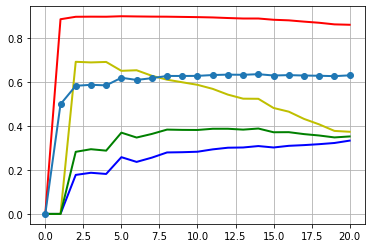

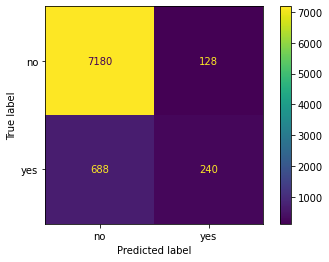

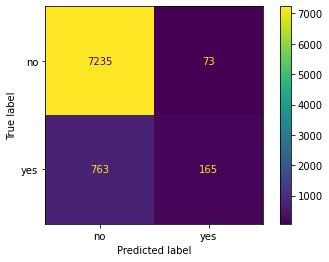

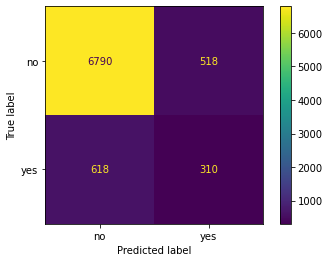

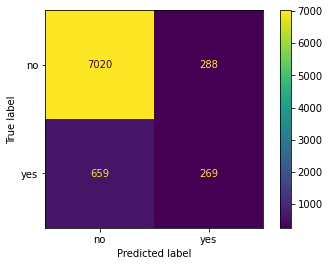

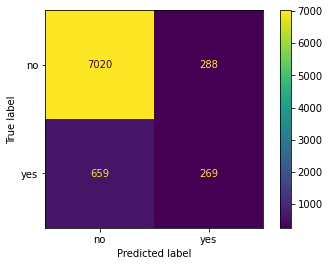

In [ ]:
model_check(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, model=DecisionTreeClassifier, count=20, message="Decision Tree with all training rows retained")

**-------------------------------------------------------------------------------**

### Decision Tree with unknown entry rows removed

Decision Tree with unknown entry rows removed
____________________________________________________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Accuracy at depth: 5 0.9023797960174842
Best Recall at depth: 20 0.3275862068965517
Best Precision at depth: 6 0.7027027027027027
Best F-score at depth: 12 0.4027491408934708
Best AUC-Score at depth: 12 0.6418565270935961
Best Accuracy wise: 
TN: 7178  FP: 130  FN: 674 TP: 254
[[7178  130]
 [ 674  254]]
Best Precision wise: 
TN: 7220  FP: 88  FN: 720 TP: 208
[[7220   88]
 [ 720  208]]
Best Recall wise: 
TN: 6815  FP: 493  FN: 624 TP: 304
[[6815  493]
 [ 624  304]]
Best F-score wise: 
TN: 7074  FP: 234  FN: 635 TP: 293
[[7074  234]
 [ 635  293]]
Best AUC-Score wise: 
TN: 7074  FP: 234  FN: 635 TP: 293
[[7074  234]
 [ 635  293]]


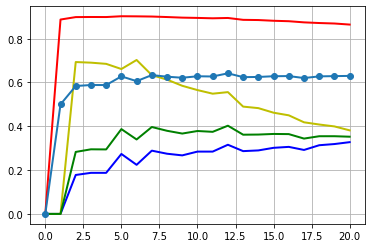

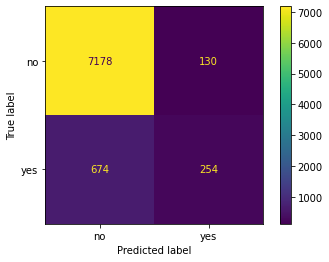

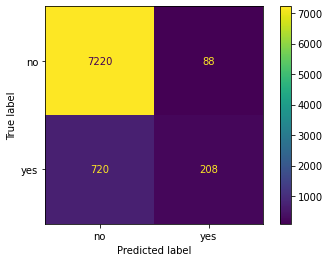

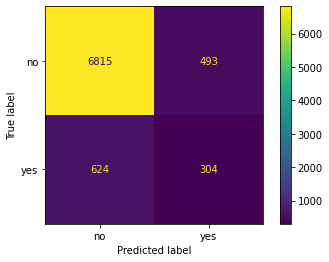

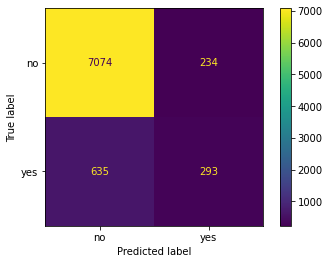

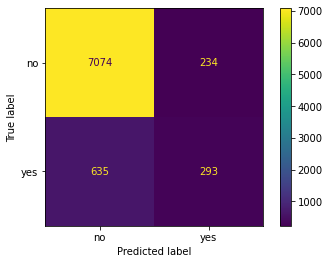

In [ ]:
model_check(X_train=X_train_1, y_train=y_train_1, X_test=X_test, y_test=y_test, model=DecisionTreeClassifier, count=20, message="Decision Tree with unknown entry rows removed")

**---------------------------------------------------------------------------------**

### Decision Tree with unknown entry rows removed and downsampled

Decision Tree with unknown entry rows removed and downsampled
____________________________________________________________________________________________________
Best Accuracy at depth: 1 0.87821758135017
Best Recall at depth: 8 0.6767241379310345
Best Precision at depth: 1 0.46153846153846156
Best F-score at depth: 5 0.5020242914979758
Best AUC-Score at depth: 5 0.7502223590585659
Best Accuracy wise: 
TN: 6783  FP: 525  FN: 478 TP: 450
[[6783  525]
 [ 478  450]]
Best Precision wise: 
TN: 6783  FP: 525  FN: 478 TP: 450
[[6783  525]
 [ 478  450]]
Best Recall wise: 
TN: 5929  FP: 1379  FN: 300 TP: 628
[[5929 1379]
 [ 300  628]]
Best F-score wise: 
TN: 7178  FP: 130  FN: 674 TP: 254
[[7178  130]
 [ 674  254]]
Best AUC-Score wise: 
TN: 7178  FP: 130  FN: 674 TP: 254
[[7178  130]
 [ 674  254]]


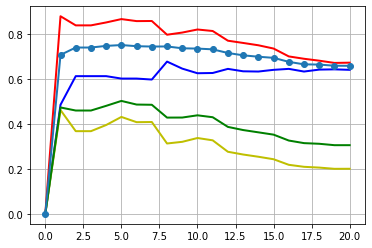

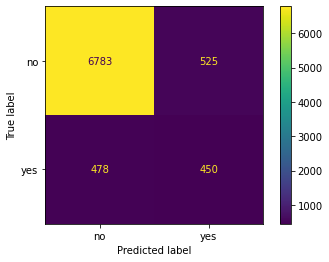

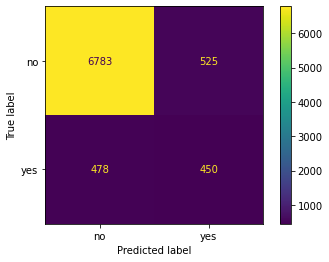

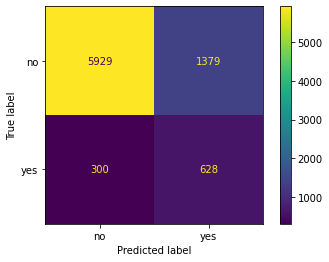

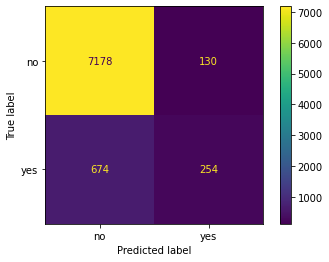

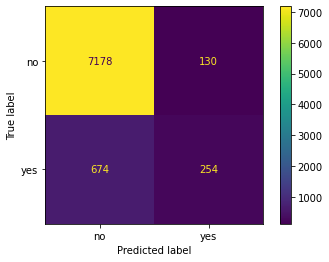

In [ ]:
model_check(X_train=X_train_2, y_train=y_train_2, X_test=X_test, y_test=y_test, model=DecisionTreeClassifier, count=20, message="Decision Tree with unknown entry rows removed and downsampled")

**--------------------------------------------------------------------------------------**

### Decision Tree  with unknown entry rows retained and downsampled

Decision Tree  with unknown entry rows retained and downsampled
____________________________________________________________________________________________________
Best Accuracy at depth: 1 0.87821758135017
Best Recall at depth: 19 0.6584051724137931
Best Precision at depth: 1 0.46153846153846156
Best F-score at depth: 6 0.5150093808630394
Best AUC-Score at depth: 7 0.7603995621237001
Best Accuracy wise: 
TN: 6783  FP: 525  FN: 478 TP: 450
[[6783  525]
 [ 478  450]]
Best Precision wise: 
TN: 6783  FP: 525  FN: 478 TP: 450
[[6783  525]
 [ 478  450]]
Best Recall wise: 
TN: 5133  FP: 2175  FN: 317 TP: 611
[[5133 2175]
 [ 317  611]]
Best F-score wise: 
TN: 7220  FP: 88  FN: 720 TP: 208
[[7220   88]
 [ 720  208]]
Best AUC-Score wise: 
TN: 7153  FP: 155  FN: 660 TP: 268
[[7153  155]
 [ 660  268]]


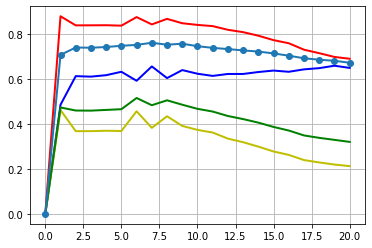

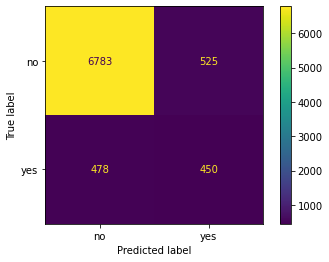

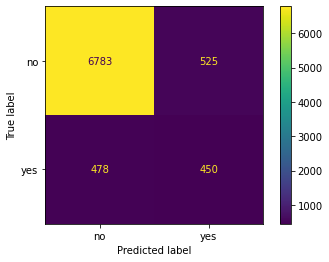

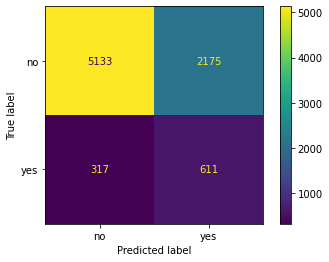

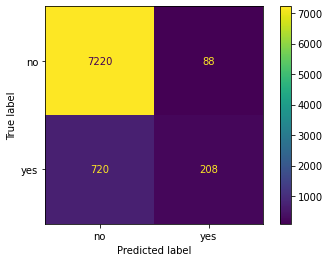

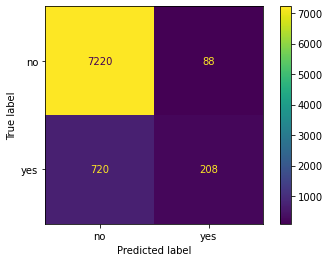

In [ ]:
model_check(X_train=X_train_3, y_train=y_train_3, X_test=X_test, y_test=y_test, model=DecisionTreeClassifier, count=20, message="Decision Tree  with unknown entry rows retained and downsampled")

**------------------------------------------------------------------------------------------**

## Summary for Decision Tree:
    Highest recall acheived: 67.67% at depth 8 for X_train_2
    Highest accuracy achieved: 90.23% at depth 5 for X_train_1
    Highest precision achieved: 70.27% at depth 6 for X_train_1
    Highest f-score achieved: 51.50% at depth 6 for X_train_2
    Highest AUC-score achieved: 76.03% at depth 7 for X_train_3

______________________________________________________________________________________
# **Random Forest Applied:**

In [ ]:
def model_check_R(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, model=RandomForestClassifier, count=100, message="Decision Tree"):
    print(message)
    print("____________________________________________________________________________________________________")
    acc = [0]
    recall = [0]
    precision = [0]
    fscore = [0]
    auc = [0]
    for i in range(1,count+1):
        model_clf = model(n_estimators=i,random_state=42)
        model_clf.fit(X_train, y_train)
        y_predicted = model_clf.predict(X_test)
        acc.append(accuracy_score(y_test, y_predicted))
        recall.append(recall_score(y_test, y_predicted, pos_label=1))
        precision.append(precision_score(y_test, y_predicted, pos_label=1))
        fscore.append(f1_score(y_test, y_predicted, pos_label=1))
        auc.append(roc_auc_score(y_test, y_predicted))
    plt.plot(acc,"r-",linewidth=2,label="Accuracy")
    plt.plot(recall,"b-",linewidth=2,label="Recall")
    plt.plot(precision,"y-",linewidth=2,label="Precision")
    plt.plot(fscore,"g-",linewidth=2,label="F-score")
    plt.plot(auc,"o-",linewidth=2,label="AUC-Score")
    plt.grid()
    print("Best Accuracy at tree-count:", np.argmax(acc), acc[np.argmax(acc)])
    print("Best Recall at tree-count:", np.argmax(recall), recall[np.argmax(recall)])
    print("Best Precision at tree-count:", np.argmax(precision), precision[np.argmax(precision)])
    print("Best F-score at tree-count:", np.argmax(fscore), fscore[np.argmax(fscore)])
    print("Best AUC-Score at tree-count:", np.argmax(auc), auc[np.argmax(auc)])

    print("Best Accuracy wise: ")
    tree_clf = model(n_estimators=np.argmax(acc),random_state=42)
    tree_clf.fit(X_train, y_train)
    y_predicted = tree_clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted)
    tn, fp, fn, tp = cm.ravel()
    print("TN:",tn," FP:", fp, " FN:", fn,"TP:", tp)
    print(confusion_matrix(y_test, y_predicted))
    ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['no','yes']).plot(values_format='d')


    print("Best Precision wise: ")
    tree_clf = model(n_estimators=np.argmax(precision),random_state=42)
    tree_clf.fit(X_train, y_train)
    y_predicted = tree_clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted)
    tn, fp, fn, tp = cm.ravel()
    print("TN:",tn," FP:", fp, " FN:", fn,"TP:", tp)
    print(confusion_matrix(y_test, y_predicted))
    ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['no','yes']).plot(values_format='d')

    print("Best Recall wise: ")
    tree_clf = model(n_estimators=np.argmax(recall),random_state=42)
    tree_clf.fit(X_train, y_train)
    y_predicted = tree_clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted)
    tn, fp, fn, tp = cm.ravel()
    print("TN:",tn," FP:", fp, " FN:", fn,"TP:", tp)
    print(confusion_matrix(y_test, y_predicted))
    ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['no','yes']).plot(values_format='d')
    

    print("Best F-score wise: ")
    tree_clf = model(n_estimators=np.argmax(fscore),random_state=42)
    tree_clf.fit(X_train_1, y_train_1)
    y_predicted = tree_clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted)
    tn, fp, fn, tp = cm.ravel()
    print("TN:",tn," FP:", fp, " FN:", fn,"TP:", tp)
    print(confusion_matrix(y_test, y_predicted))
    ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['no','yes']).plot(values_format='d')
    
    print("Best AUC-Score wise: ")
    tree_clf = model(max_depth=np.argmax(auc),random_state=42)
    tree_clf.fit(X_train_1, y_train_1)
    y_predicted = tree_clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted)
    tn, fp, fn, tp = cm.ravel()
    print("TN:",tn," FP:", fp, " FN:", fn,"TP:", tp)
    print(confusion_matrix(y_test, y_predicted))
    ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['no','yes']).plot(values_format='d')

RF with all training rows
____________________________________________________________________________________________________
Best Accuracy at tree-count: 14 0.8955803788246721
Best Recall at tree-count: 1 0.33620689655172414
Best Precision at tree-count: 14 0.5745614035087719
Best F-score at tree-count: 17 0.39444444444444443
Best AUC-Score at tree-count: 17 0.6374178981937603
Best Accuracy wise: 
TN: 7114  FP: 194  FN: 666 TP: 262
[[7114  194]
 [ 666  262]]
Best Precision wise: 
TN: 7114  FP: 194  FN: 666 TP: 262
[[7114  194]
 [ 666  262]]
Best Recall wise: 
TN: 6670  FP: 638  FN: 616 TP: 312
[[6670  638]
 [ 616  312]]
Best F-score wise: 
TN: 7072  FP: 236  FN: 637 TP: 291
[[7072  236]
 [ 637  291]]
Best AUC-Score wise: 
TN: 7156  FP: 152  FN: 677 TP: 251
[[7156  152]
 [ 677  251]]


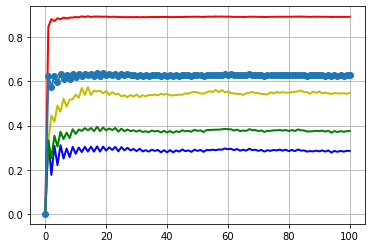

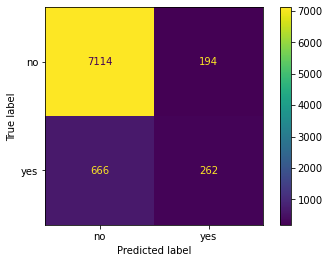

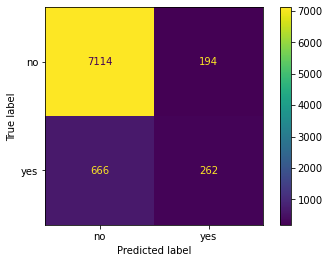

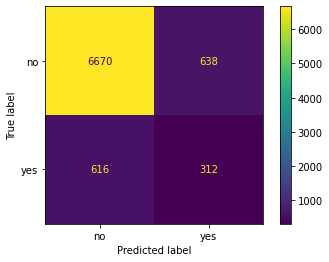

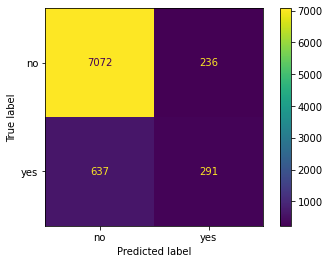

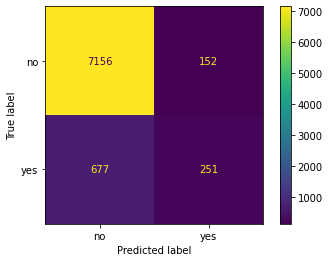

In [ ]:
model_check_R(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, model=RandomForestClassifier, count=100, message="RF with all training rows")

RF with unknown entry rows removed
____________________________________________________________________________________________________
Best Accuracy at tree-count: 40 0.8959446333171442
Best Recall at tree-count: 1 0.3254310344827586
Best Precision at tree-count: 40 0.576017130620985
Best F-score at tree-count: 17 0.4
Best AUC-Score at tree-count: 17 0.6406421045429666
Best Accuracy wise: 
TN: 7110  FP: 198  FN: 659 TP: 269
[[7110  198]
 [ 659  269]]
Best Precision wise: 
TN: 7110  FP: 198  FN: 659 TP: 269
[[7110  198]
 [ 659  269]]
Best Recall wise: 
TN: 6675  FP: 633  FN: 626 TP: 302
[[6675  633]
 [ 626  302]]
Best F-score wise: 
TN: 7072  FP: 236  FN: 637 TP: 291
[[7072  236]
 [ 637  291]]
Best AUC-Score wise: 
TN: 7156  FP: 152  FN: 677 TP: 251
[[7156  152]
 [ 677  251]]


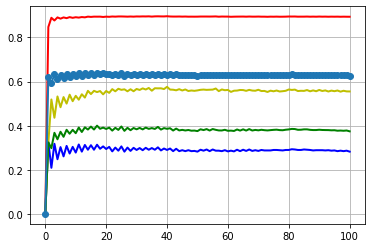

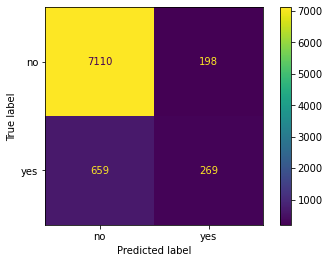

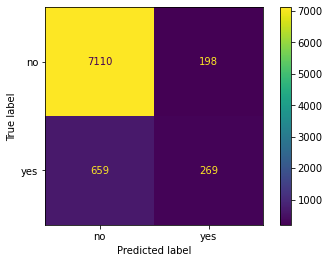

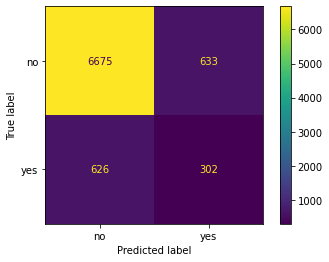

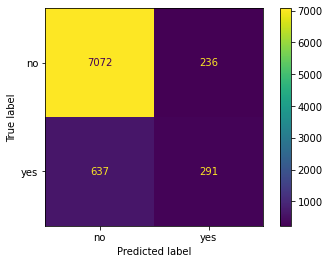

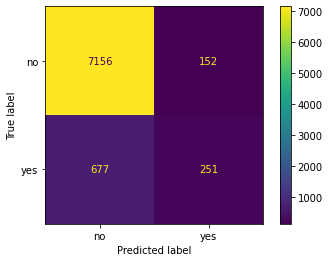

In [ ]:
model_check_R(X_train=X_train_1, y_train=y_train_1, X_test=X_test, y_test=y_test, model=RandomForestClassifier, count=100, message="RF with unknown entry rows removed")

RF with unknown entry rows removed and downsampled
____________________________________________________________________________________________________
Best Accuracy at tree-count: 2 0.8043953375424964
Best Recall at tree-count: 11 0.6853448275862069
Best Precision at tree-count: 68 0.3074656188605108
Best F-score at tree-count: 68 0.4224021592442645
Best AUC-Score at tree-count: 49 0.7409003831417623
Best Accuracy wise: 
TN: 6164  FP: 1144  FN: 467 TP: 461
[[6164 1144]
 [ 467  461]]
Best Precision wise: 
TN: 5898  FP: 1410  FN: 302 TP: 626
[[5898 1410]
 [ 302  626]]
Best Recall wise: 
TN: 5633  FP: 1675  FN: 292 TP: 636
[[5633 1675]
 [ 292  636]]
Best F-score wise: 
TN: 7099  FP: 209  FN: 663 TP: 265
[[7099  209]
 [ 663  265]]
Best AUC-Score wise: 
TN: 7098  FP: 210  FN: 666 TP: 262
[[7098  210]
 [ 666  262]]


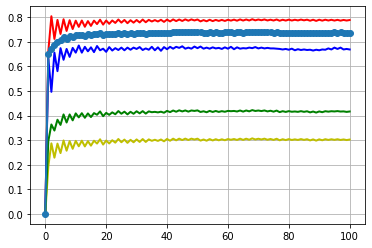

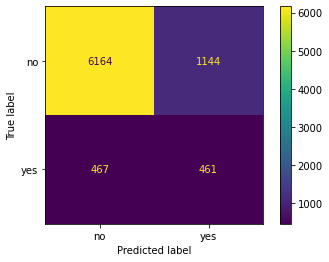

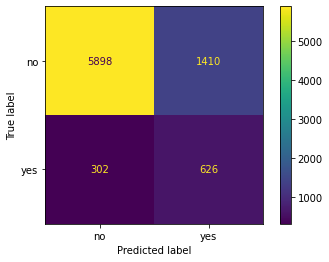

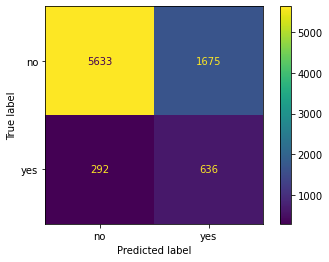

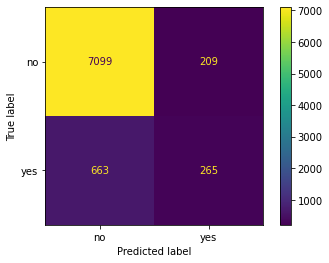

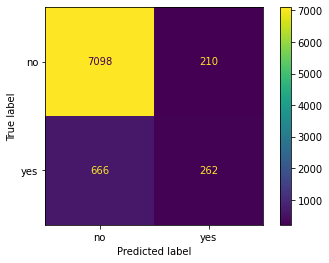

In [ ]:
model_check_R(X_train=X_train_2, y_train=y_train_2, X_test=X_test, y_test=y_test, model=RandomForestClassifier, count=100, message="RF with unknown entry rows removed and downsampled")

RF with unknown entry rows retained and downsampled
____________________________________________________________________________________________________
Best Accuracy at tree-count: 2 0.7965031568722681
Best Recall at tree-count: 25 0.6982758620689655
Best Precision at tree-count: 78 0.3052073288331726
Best F-score at tree-count: 78 0.42171885409726845
Best AUC-Score at tree-count: 78 0.7424654488232075
Best Accuracy wise: 
TN: 6076  FP: 1232  FN: 444 TP: 484
[[6076 1232]
 [ 444  484]]
Best Precision wise: 
TN: 5867  FP: 1441  FN: 295 TP: 633
[[5867 1441]
 [ 295  633]]
Best Recall wise: 
TN: 5676  FP: 1632  FN: 280 TP: 648
[[5676 1632]
 [ 280  648]]
Best F-score wise: 
TN: 7095  FP: 213  FN: 661 TP: 267
[[7095  213]
 [ 661  267]]
Best AUC-Score wise: 
TN: 7098  FP: 210  FN: 666 TP: 262
[[7098  210]
 [ 666  262]]


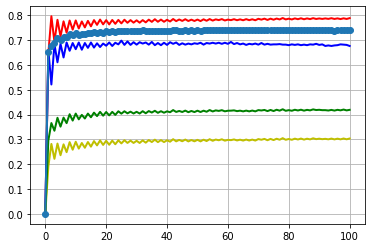

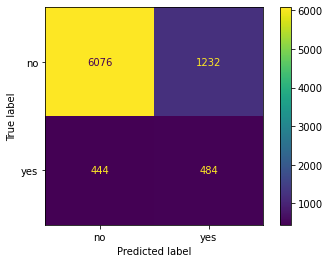

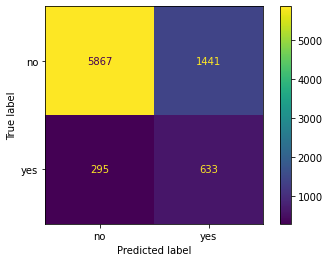

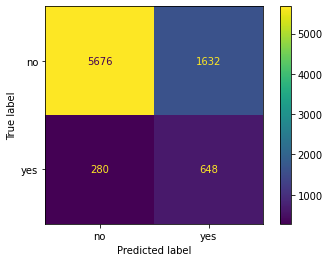

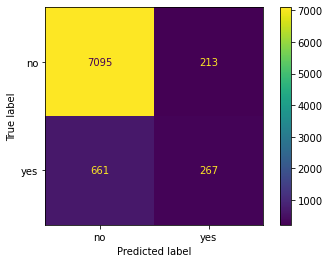

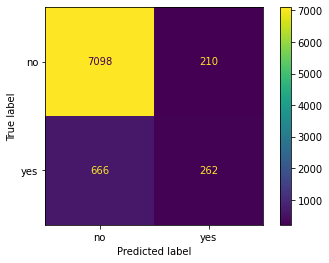

In [ ]:
model_check_R(X_train=X_train_3, y_train=y_train_3, X_test=X_test, y_test=y_test, model=RandomForestClassifier, count=100, message="RF with unknown entry rows retained and downsampled")

# Summary for Random Forest:
    Highest recall acheived: 69.82% at trees_count 25 for X_train_3
    Highest accuracy achieved: 89.59% at trees_count 40 for X_train_1
    Highest precision achieved: 57.45% at trees_count 14 for X_train
    Highest f-score achieved: 42.24% at trees_count 68 for X_train_2
    Highest AUC-score achieved: 76.03% at trees_count 68 for X_train_3
 

## **Naive Bayes Applied:**

In [45]:
def naive(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, model=GaussianNB, scale = False, message="Guassian_NB with all training rows"):
    print("Scale: ", scale,"->", message)
    print("____________________________________________________________________________________________________")
    if scale:
        scaler = RobustScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    model_clf = model()
    model_clf.fit(X_train, y_train)
    y_predicted = model_clf.predict(X_test)
    print("accuracy: ",accuracy_score(y_test, y_predicted))
    print("recall: ",recall_score(y_test, y_predicted, pos_label=1))
    print("precision: ",precision_score(y_test, y_predicted, pos_label=1))
    print("f1_score: ",f1_score(y_test, y_predicted, pos_label=1))
    print("AUC-Score: ", roc_auc_score(y_test, y_predicted))
    cm = confusion_matrix(y_test, y_predicted)
    tn, fp, fn, tp = cm.ravel()
    print("TN:",tn," FP:", fp, " FN:", fn,"TP:", tp)
    print(confusion_matrix(y_test, y_predicted))
    ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['no','yes']).plot(values_format='d')

Scale:  True -> Guassian_NB with all training rows
____________________________________________________________________________________________________
accuracy:  0.8569694026226323
recall:  0.47198275862068967
precision:  0.38898756660746003
f1_score:  0.4264849074975657
AUC-Score:  0.6889196770662288
TN: 6620  FP: 688  FN: 490 TP: 438
[[6620  688]
 [ 490  438]]


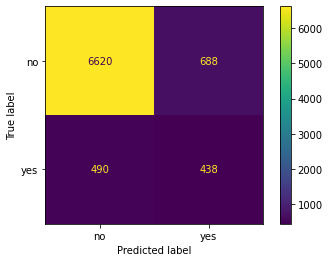

In [46]:
naive(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, model=GaussianNB, scale = True, message="Guassian_NB with all training rows")

Scale:  False -> Guassian_NB with all training rows
____________________________________________________________________________________________________
accuracy:  0.8569694026226323
recall:  0.47198275862068967
precision:  0.38898756660746003
f1_score:  0.4264849074975657
AUC-Score:  0.6889196770662288
TN: 6620  FP: 688  FN: 490 TP: 438
[[6620  688]
 [ 490  438]]


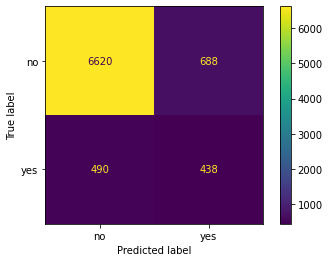

In [47]:
naive(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, model=GaussianNB, scale = False, message="Guassian_NB with all training rows")


Scale:  True -> Guassian_NB with unknown entry training rows removed
____________________________________________________________________________________________________
accuracy:  0.8668042739193783
recall:  0.4482758620689655
precision:  0.4155844155844156
f1_score:  0.4313115603939865
AUC-Score:  0.6841133004926109
TN: 6723  FP: 585  FN: 512 TP: 416
[[6723  585]
 [ 512  416]]


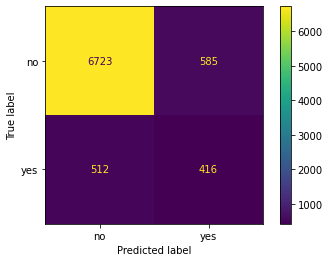

In [48]:

naive(X_train=X_train_1, y_train=y_train_1, X_test=X_test, y_test=y_test, model=GaussianNB, scale = True, message="Guassian_NB with unknown entry training rows removed")

Scale:  False -> Guassian_NB with unknown entry training rows removed
____________________________________________________________________________________________________
accuracy:  0.8668042739193783
recall:  0.4482758620689655
precision:  0.4155844155844156
f1_score:  0.4313115603939865
AUC-Score:  0.6841133004926109
TN: 6723  FP: 585  FN: 512 TP: 416
[[6723  585]
 [ 512  416]]


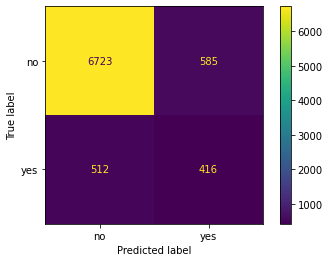

In [49]:

naive(X_train=X_train_1, y_train=y_train_1, X_test=X_test, y_test=y_test, model=GaussianNB, scale = False, message="Guassian_NB with unknown entry training rows removed")


Scale:  True -> Guassian_NB with unknown entry training rows removed and downsampled
____________________________________________________________________________________________________
accuracy:  0.8592763477416221
recall:  0.46012931034482757
precision:  0.3935483870967742
f1_score:  0.42424242424242425
AUC-Score:  0.6850454980842913
TN: 6650  FP: 658  FN: 501 TP: 427
[[6650  658]
 [ 501  427]]


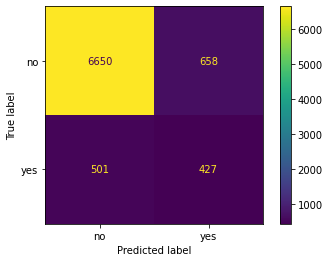

In [50]:

naive(X_train=X_train_2, y_train=y_train_2, X_test=X_test, y_test=y_test, model=GaussianNB, scale = True, message="Guassian_NB with unknown entry training rows removed and downsampled")


Scale:  False -> Guassian_NB with unknown entry training rows removed and downsampled
____________________________________________________________________________________________________
accuracy:  0.8592763477416221
recall:  0.46012931034482757
precision:  0.3935483870967742
f1_score:  0.42424242424242425
AUC-Score:  0.6850454980842913
TN: 6650  FP: 658  FN: 501 TP: 427
[[6650  658]
 [ 501  427]]


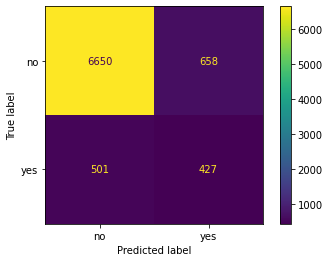

In [51]:
naive(X_train=X_train_2, y_train=y_train_2, X_test=X_test, y_test=y_test, model=GaussianNB, scale = False, message="Guassian_NB with unknown entry training rows removed and downsampled")


Scale:  True -> Guassian_NB with unknown entry training rows retained and downsampled
____________________________________________________________________________________________________
accuracy:  0.8404565322972317
recall:  0.5226293103448276
precision:  0.35766961651917406
f1_score:  0.4246935201401051
AUC-Score:  0.701722427476738
TN: 6437  FP: 871  FN: 443 TP: 485
[[6437  871]
 [ 443  485]]


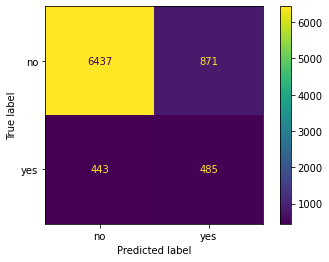

In [52]:

naive(X_train=X_train_3, y_train=y_train_3, X_test=X_test, y_test=y_test, model=GaussianNB, scale = True, message="Guassian_NB with unknown entry training rows retained and downsampled")


Scale:  False -> Guassian_NB with unknown entry training rows retained and downsampled
____________________________________________________________________________________________________
accuracy:  0.8404565322972317
recall:  0.5226293103448276
precision:  0.35766961651917406
f1_score:  0.4246935201401051
AUC-Score:  0.701722427476738
TN: 6437  FP: 871  FN: 443 TP: 485
[[6437  871]
 [ 443  485]]


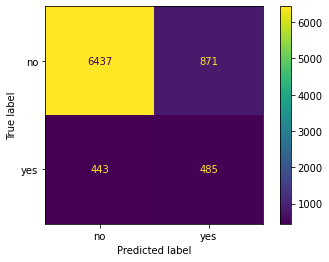

In [54]:

naive(X_train=X_train_3, y_train=y_train_3, X_test=X_test, y_test=y_test, model=GaussianNB, scale = False, message="Guassian_NB with unknown entry training rows retained and downsampled")


## Summary for Gaussian Naive-Bayes:
    Recall acheived: 52.26% for X_train_3 with/without scaling
    Accuracy achieved: 86.68% for X_train_1 with/without scaling
    Precision achieved: 41.55% for X_train_1 with/without scaling
    F-score achieved: 43.13% for X_train_1 with/without scaling
    AUC-score achieved: 70.17% for X_train_3 with/without scaling
    
___________________________________________________

### **Comment about our models**

---


**Here we can see that in this data set "Decision Tree" overall performance is  very well.
Hence we can use this model as a generalize model for further prediction.**